Imports


In [1]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import re
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor

Preliminary Pre-Processing


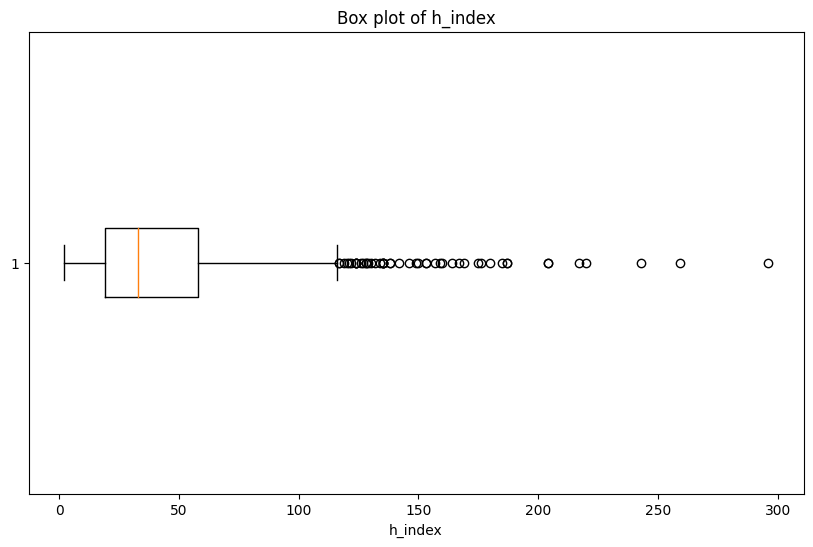

Outliers detected in 'h_index':
13     126
23     132
24     124
35     146
127    135
198    296
206    124
212    167
239    128
248    217
303    129
316    220
323    185
340    153
381    150
392    160
403    128
412    204
418    124
419    243
429    149
445    138
459    117
483    187
485    176
524    187
525    120
533    157
537    134
541    135
552    169
627    124
640    127
647    153
660    180
663    135
665    119
669    175
693    135
707    142
712    159
727    130
812    164
839    138
895    117
912    259
941    122
967    121
977    204
Name: h_index, dtype: int64
49
(2948, 12)


In [2]:
#import libraries
import numpy as np
import pandas as pd
import io
from google.colab import files
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import re
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
#uploaded data frame
scholar_profile = pd.read_csv('gscholar_profiles.csv')

#fill in null values
scholar_profile.fillna('NA', inplace=True)

#drop user_id column
scholar_profile.drop(['user_id'],axis=1, inplace=True)


h_index = scholar_profile['h_index'][:1000]
plt.figure(figsize=(10, 6))
plt.boxplot(h_index, vert=False)
plt.title('Box plot of h_index')
plt.xlabel('h_index')
plt.show()

# Function to detect outliers based on the IQR method
def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect outliers in the 'h_index' column
outliers = detect_outliers(h_index)
print("Outliers detected in 'h_index':")
print(outliers)
print(len(outliers))

scholar_profile = scholar_profile.loc[scholar_profile['h_index'] <70]

print(scholar_profile.shape)

scholar_profile = scholar_profile.reset_index(drop=True)



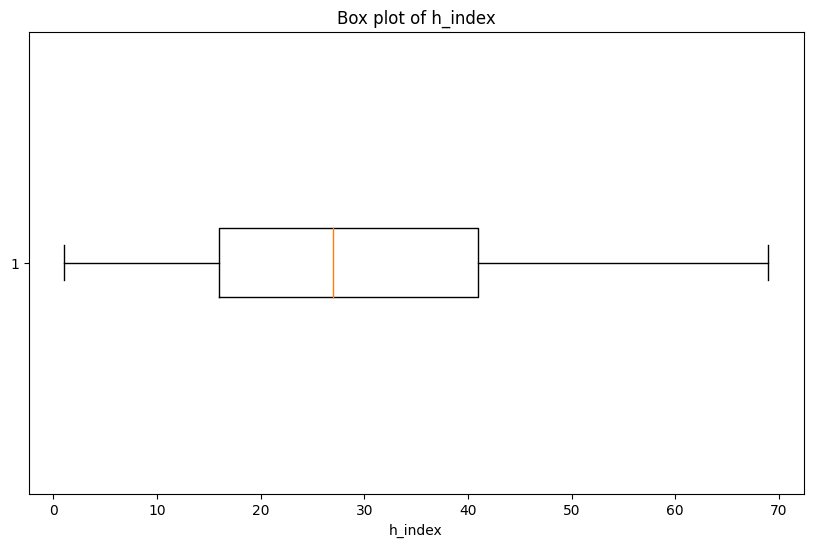

In [3]:
detect_outliers(h_index)

h_index = scholar_profile['h_index'][:1000]
plt.figure(figsize=(10, 6))
plt.boxplot(h_index, vert=False)
plt.title('Box plot of h_index')
plt.xlabel('h_index')
plt.show()

In [4]:
#Creating a function in order to modify train-test split when there are added features
def add_features(X_in, columns):

  for i in range(len(columns)):
    column = scholar_profile[columns[i]][:2948]
    column = column.to_numpy()
    column = column/np.max(column)
    X_out = np.insert(X_in, i, column, axis=1)
    X_in=X_out
  return X_out

In [5]:
#Creating a function in order modify train-test split when we just have new features of the dataset

def just_new_features(X_in, columns):

  X_updated = add_features(X_in, columns)
  X_new = X_updated[:, :len(columns)]
  print(X_new.shape)
  return X_new

Implementing a Count Vectorizer

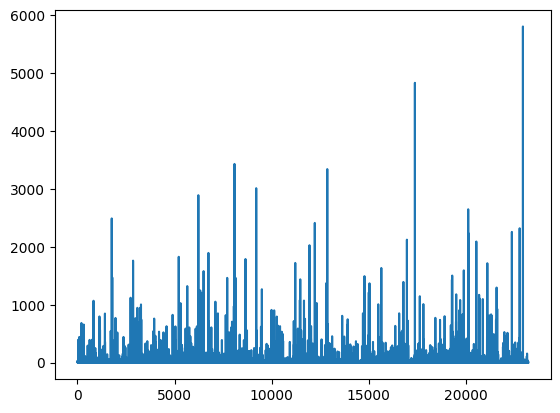

2830
[3 1 1 ... 1 1 1]


In [6]:

def custom_tokenizer(text):
    # Use a regular expression to find all words with length >= 3 and without numbers
    tokens = re.findall(r'\b[a-zA-Z]{4,}\b', text)
    return tokens


#splitting the string of all titles into each individual title
titles = []
for i in range(2948):
  titles1 = scholar_profile["publication_titles"][i]

  titles1 = titles1.replace(";", "")



  titles.append(titles1.lower())
  """
  titles.append(titles1[1].lower())
  titles.append(titles1[2].lower())
  titles.append(titles1[3].lower())
  titles.append(titles1[4].lower())
  """

#create count vectorizer
count_vec = CountVectorizer(analyzer=custom_tokenizer)
count_matrix = count_vec.fit_transform(titles)
feat_names = count_vec.get_feature_names_out()
count_array = count_matrix.toarray()

#Calculate frequencies
word_freq = np.sum(count_array, axis = 0)

updated_feat_names = []
for i in range(len(feat_names)):
  if(word_freq[i]<50 and word_freq[i] >10):

    updated_feat_names.append(feat_names[i])
    #print(feat_names[i], word_freq[i])
    """
  else:
    print(feat_names[i])
    """

plt.plot(word_freq)
plt.show()
print(len(updated_feat_names))
print(word_freq)
i = np.max(word_freq)




Modular Code to Plot Model Results

In [7]:
#y_train vs y_pred
import numpy as np
import statsmodels.api as sm
from scipy import stats


def plot(y_test, y_pred):
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Regression Line')
  plt.xlabel('Actual h-index')
  plt.ylabel('Predicted h-index')
  plt.title('Actual vs Predicted h-index')
  plt.legend()
  plt.show()

  print(feature_names)
  print(tfidf_array.shape)
  compute_slope(y_test, y_pred)
  compute_stat(y_test, y_pred)
def compute_slope(y_test, y_pred):


    # Calculate the means of x and y
    x_mean = np.mean(y_test)
    y_mean = np.mean(y_pred)

    # Calculate the numerator and denominator for the slope (m)
    numerator = np.sum((y_test - x_mean) * (y_pred- y_mean))
    denominator = np.sum((y_test - x_mean) ** 2)

    # Calculate the slope
    slope = numerator / denominator

    return slope

def compute_stat(y_test,y_pred):
  slope, intercept, r_value, p_value, std_err = stats.linregress( y_test, y_pred)
  print(slope, intercept, r_value, p_value, std_err)
  print(r_value**2)

Implementing a Tf-Idf vectorizer using the output of the count vectorizer (updated_feat_names)

In [8]:
vectorizer = TfidfVectorizer(analyzer=custom_tokenizer, vocabulary=updated_feat_names)



# Fit and transform the sentences
tfidf_matrix = vectorizer.fit_transform(titles)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()
#print(len(feature_names))

#convert it into an array
tfidf_array = tfidf_matrix.toarray()
#print(feature_names)
#print(len(feature_names))

##scholar_profile.head()
#print(feature_names[:5])
print(max(tfidf_matrix[1]))
print(feature_names[941])
print(tfidf_matrix.shape)
print(len(feature_names))

print(tfidf_array)

  (0, 2222)	0.17861478046904436
  (0, 2001)	0.1598681153353595
  (0, 1856)	0.1598681153353595
  (0, 1384)	0.15706882020178556
  (0, 1374)	0.5794226822752586
  (0, 1335)	0.3329195027192113
  (0, 1293)	0.18496021114001984
  (0, 1165)	0.1589040724825431
  (0, 1061)	0.15371947811875036
  (0, 1036)	0.1561937806787932
  (0, 1003)	0.1690466740298779
  (0, 980)	0.15797164335245423
  (0, 941)	0.18268407342836177
  (0, 514)	0.17677952818828682
  (0, 508)	0.14933596604337665
  (0, 489)	0.3802896110076252
  (0, 377)	0.17043409751731137
  (0, 233)	0.15534486567823041
extensive
(2948, 2830)
2830
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Splitting data into train and test

In [9]:
columns=  ["citation_number"]
X = tfidf_array

X = np.array(X)
print(X.shape)
y = scholar_profile["h_index"][:2948]
y = np.array(y)  #size of 100 samples

X1 = add_features(X, columns)
X2 = just_new_features(X, columns)



print(updated_feat_names)

(2948, 2830)
(2948, 1)
['abelian', 'ability', 'abinit', 'about', 'above', 'absence', 'absorbers', 'absorbing', 'abstraction', 'abundant', 'accelerate', 'accelerates', 'acceptors', 'access', 'accessibility', 'accessible', 'accessing', 'accounting', 'accumulation', 'acenes', 'acetate', 'acetone', 'acetonitrile', 'acetylene', 'achieve', 'achieved', 'achieving', 'acidity', 'actin', 'acting', 'actions', 'activating', 'activities', 'actuation', 'acute', 'adaptation', 'adapted', 'adaptivity', 'adatom', 'adatoms', 'added', 'additional', 'additions', 'addressing', 'adducts', 'adenine', 'adhesive', 'adsorbate', 'adsorbates', 'advancing', 'advantage', 'advantages', 'adverse', 'aerosol', 'aeruginosa', 'affect', 'affected', 'affecting', 'affects', 'affinities', 'aflow', 'after', 'aggregates', 'agreement', 'aided', 'aiida', 'aisi', 'alanine', 'alchemical', 'alcohol', 'alcohols', 'aldehydes', 'alder', 'algebra', 'algebraic', 'algorithmic', 'aliphatic', 'alkane', 'alkanes', 'alkenes', 'alkyl', 'alkyla


Models

Random Forest


Random Forest with original features

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Random Forest regressor

num_trees = [10,20, 30]
mse_scores = []
for val in num_trees:
  rf_regressor = RandomForestRegressor(n_estimators=val, random_state=42, max_depth=100)

# Train the model
  rf_regressor.fit(X_train, y_train)

# Make predictions
  y_pred = rf_regressor.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(mse)
  mse_scores.append(mse)
#print(mse)




294.33930341088023
281.4230234020195
280.0607376916789


285.2743548348596


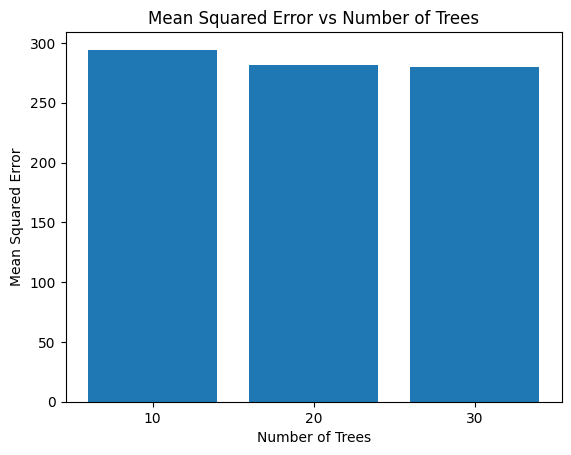

100
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


In [25]:
print(sum(mse_scores)/3)

new_lst = []
for num in num_trees:
  new_lst.append(str(num))
plt.bar(new_lst, mse_scores)
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Number of Trees')
plt.show()

tree_depths = [tree.tree_.max_depth for tree in rf_regressor.estimators_]
max_depth = np.max(tree_depths)
print(max_depth)
print(tree_depths)

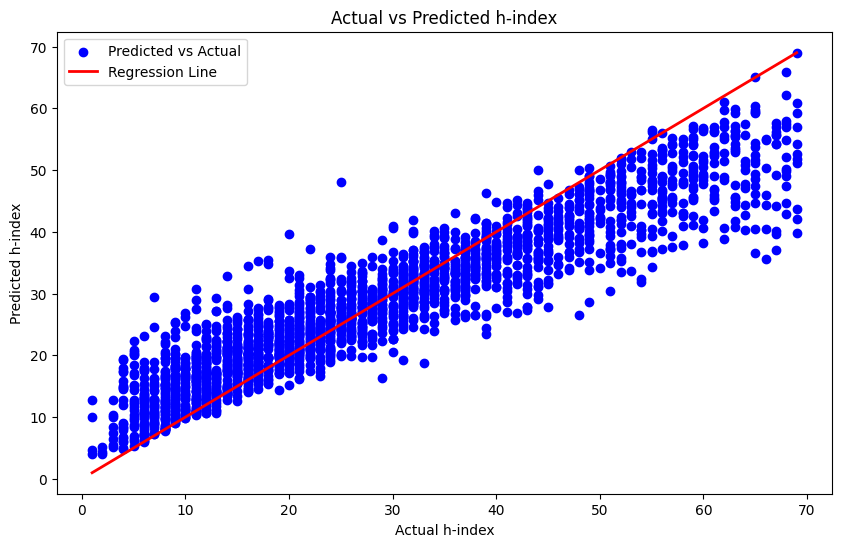

['abelian' 'ability' 'abinit' ... 'znse' 'zone' 'zwitterionic']
(2948, 2830)
0.6688115537821175 9.16125023949414 0.9303156037685508 0.0 0.0054320999222404265
0.8654871226152433


In [ ]:
plot(y_train, y_pred)

Random Forest with Updated features

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42) #adding three new columns
print(X.shape)

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)

(2948, 2830)
67.12140677966103


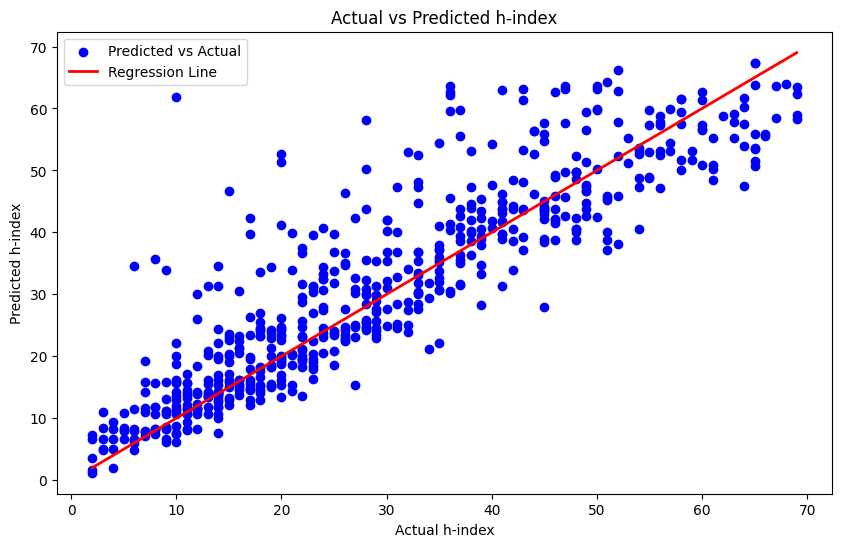

['abelian' 'ability' 'abinit' ... 'znse' 'zone' 'zwitterionic']
(2948, 2830)
0.8733929035795893 5.7420512941056 0.8870345775996106 1.6375376338470067e-199 0.01874749043891372
0.7868303418573196


In [ ]:
plot(y_test, y_pred)

Random Forest with just updated features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
#print(X.shape)
# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)

82.4156216895239


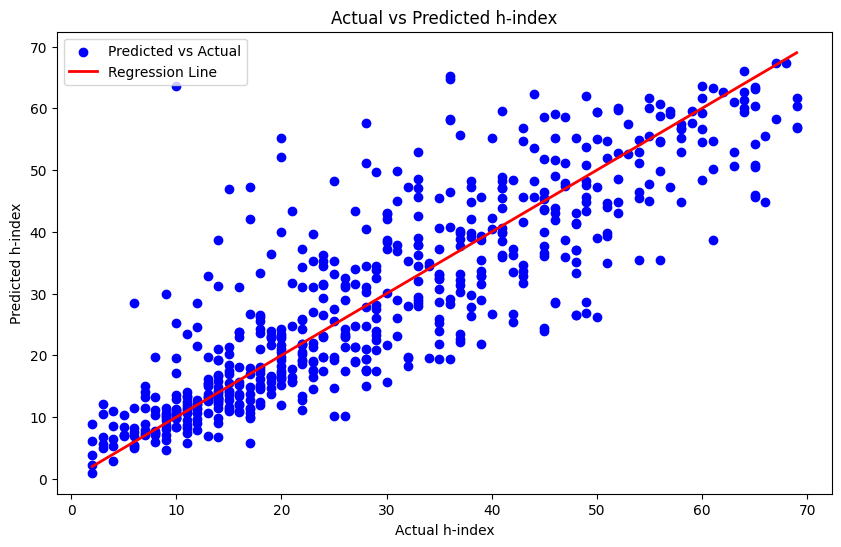

['abelian' 'ability' 'abinit' ... 'znse' 'zone' 'zwitterionic']
(2948, 2830)
0.8421885879069462 4.740937871898897 0.8527982262501176 4.941384804205231e-168 0.02126889785417812
0.7272648146953468


In [ ]:
plot(y_test,y_pred)

SVM

Mean Squared Error: 260.4890192157368
R^2 Score: 0.020638445769518232


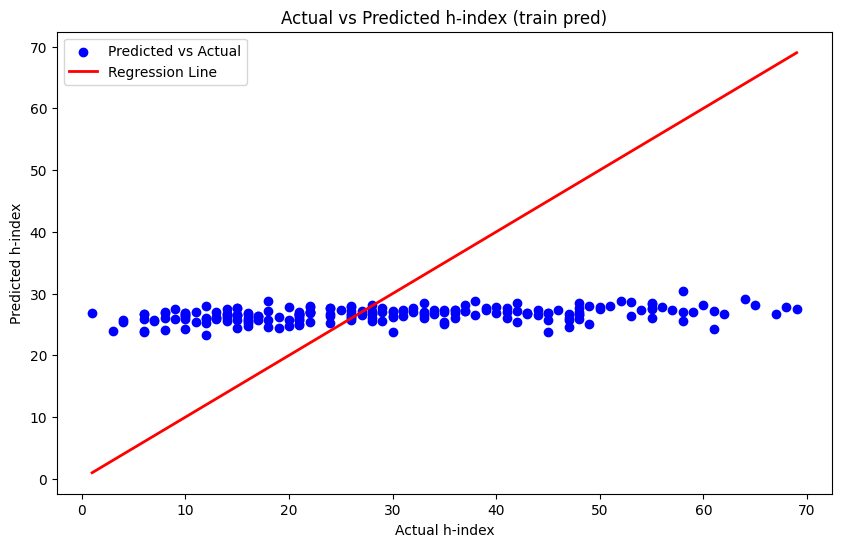

['aaa' 'aapl' 'aaronson' ... 'zwanzig' 'zweidimensionalen' 'zwitterionic']
(1000, 12606)
0.027949144815354657 25.788087426055657 0.40539536539019605 2.602636511472978e-09 0.00447889161348489
0.16434540227985056


In [ ]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svr_regressor = SVR(kernel='linear')

# Train the model
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svr_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plot(y_test, y_pred)

SVM with added features

Mean Squared Error: 869.8486687660285
R^2 Score: -2.0705179119552684


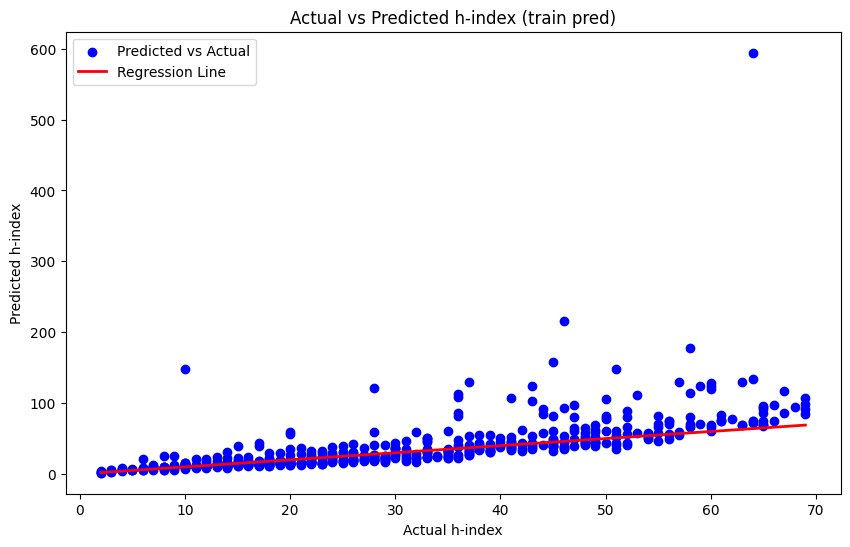

['abelian' 'ability' 'abinit' ... 'znse' 'zone' 'zwitterionic']
(2948, 2830)
1.45387146481625 -7.594385935370632 0.6594931791503007 6.526552596085313e-75 0.06834042657432798
0.4349312533457706


In [ ]:
columns = ["publication_number", "citation_number", "citation_number_since2018"]

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42) #adding three new columns

svr_regressor = SVR(kernel='linear')

# Train the model
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svr_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plot(y_test, y_pred)

SVM with just added features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
svr_regressor = SVR(kernel='linear')

# Train the model
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svr_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plot(y_test, y_pred)

[[2.0000e+01 2.3790e+03 8.2800e+02]
 [2.0000e+01 2.8557e+04 1.8020e+04]
 [2.0000e+01 8.6140e+03 5.3130e+03]
 ...
 [2.0000e+01 8.2100e+03 2.9400e+03]
 [2.0000e+01 4.9490e+03 1.2700e+03]
 [2.0000e+01 7.3600e+02 3.0400e+02]]


KeyboardInterrupt: 

Decision Tree Regressor

Mean Squared Error: 489.76949152542375
R^2 Score: -0.7288593412362185


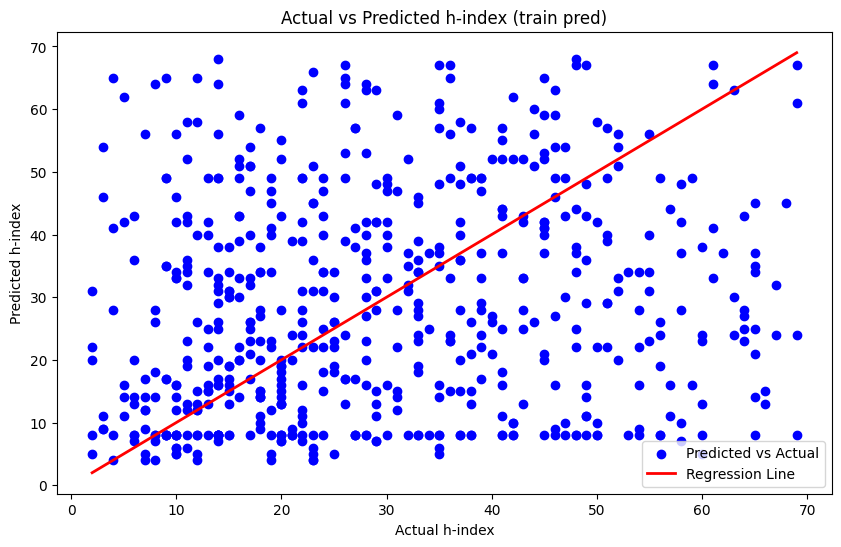

['abelian' 'ability' 'abinit' ... 'znse' 'zone' 'zwitterionic']
(2948, 2830)
0.1733482443508002 23.698452957262337 0.16727490287136895 4.44043076451866e-05 0.0421344567729348
0.027980893130625916


In [ ]:
from sklearn.tree import DecisionTreeRegressor# Initialize the Decision Tree regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plot(y_test, y_pred)

Decision Tree Regressor with updated features

Mean Squared Error: 83.62542372881356
R^2 Score: 0.7048068581648448


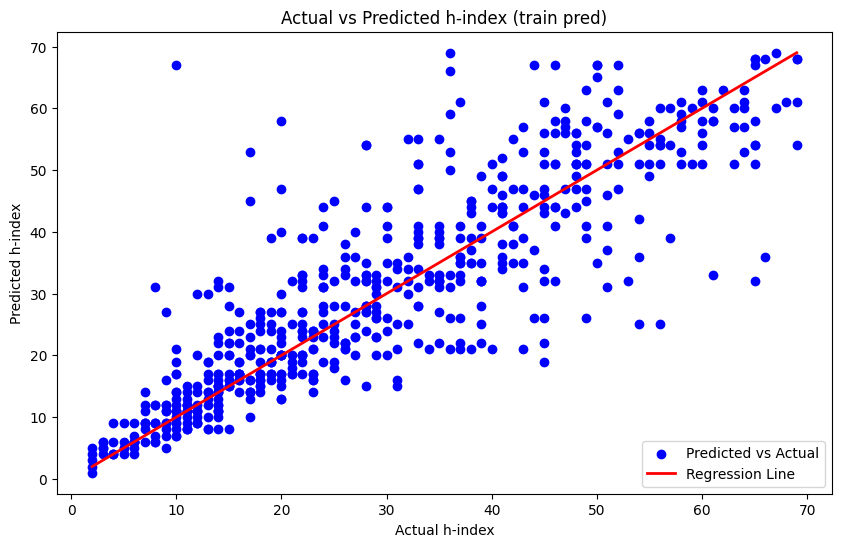

['abelian' 'ability' 'abinit' ... 'znse' 'zone' 'zwitterionic']
(2948, 2830)
0.8761289080323698 4.725608911953952 0.8577192316576084 4.88183975900309e-172 0.021656952236233387
0.7356822803553181


In [ ]:
columns = ["publication_number", "citation_number", "citation_number_since2018"]

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42) #adding three new columns
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plot(y_test, y_pred)

Decision Tree Regressor with just new features

Mean Squared Error: 82.86271186440678
R^2 Score: 0.7074991890557388


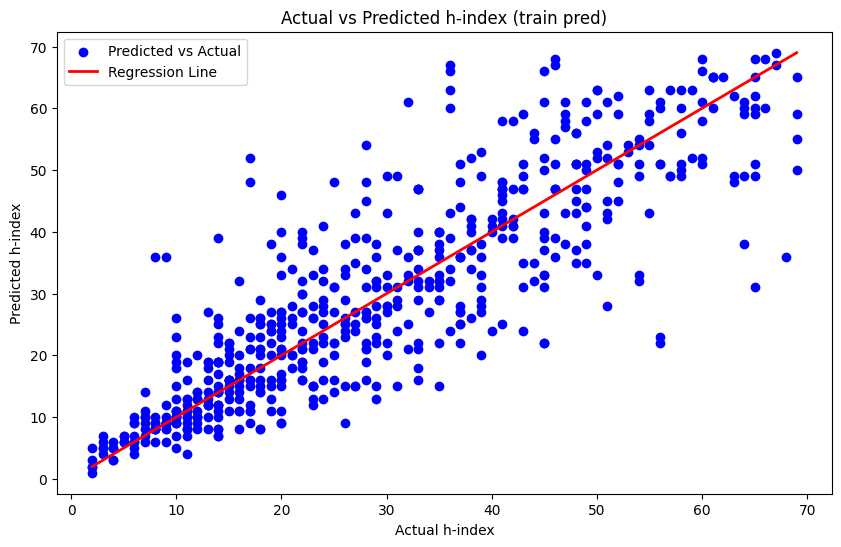

['abelian' 'ability' 'abinit' ... 'znse' 'zone' 'zwitterionic']
(2948, 2830)
0.8812806198133077 3.86860979065775 0.8581703778880614 2.0599601353072598e-172 0.021740937932191638
0.7364563974845381


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plot(y_test, y_pred)

Elastic Net

Best parameters found:  {'alpha': 0.3, 'l1_ratio': 0.1}
[273.4470460886682, 259.38112621767704, 276.93394077615665, 264.0912801837229, 257.0251824619579]
266.17571514563656


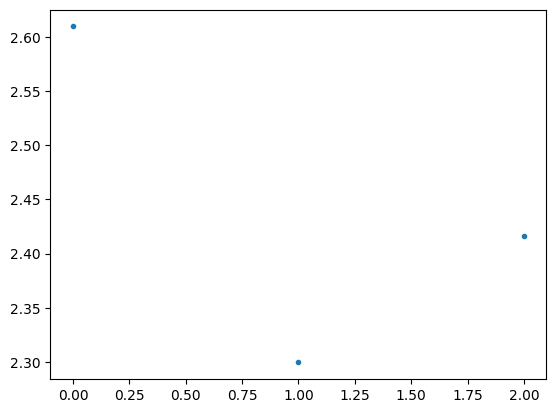

In [ ]:



from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
# Initialize the Linear Regression model
#model = LinearRegression()
#model = Lasso(alpha=0.5)

model = ElasticNet(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
#print(X2.shape)
#X, X_train, X_test, y_train, y_test = just_new_features(X_new, columns)

# Define the parameter grid
"""
param_grid = {
    'alpha': [0.00001, 0.001, 0.1, 0.2, 0.3, 0.4],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]
}
"""

param_grid = {
    'alpha': [ 0.3],
    'l1_ratio': [0.1]
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_model = ElasticNet(**best_params)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []

for train_index, test_index in kf.split(X2):
    X_train, X_test = X2[train_index], X2[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
print(mse_scores)
average_mse = np.mean(mse_scores)
print(average_mse)
plt.plot(best_model.coef_, ".")
plt.show()



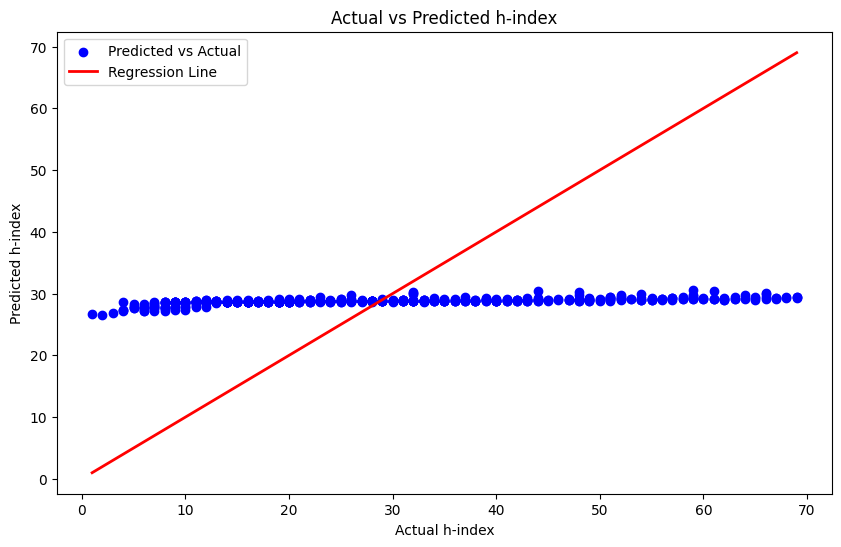

['abelian' 'ability' 'abinit' ... 'znse' 'zone' 'zwitterionic']
(2948, 2830)
0.01747470511928556 28.297168732491333 0.6688967531011047 1.211964552780358e-77 0.0008015454848907957
0.4474228663092003


In [ ]:
plot(y_test, y_pred)

Extracting Coefficients from the Elastic Net Model

In [ ]:


coefficients = best_model.coef_

#print(coefficients)
#print(len(coefficients))
lst_non_zero = []
# Example data
print(len(updated_feat_names))
print(len(coefficients))
print(len(X))

# Create a DataFrame
df = pd.DataFrame({
    'Feature': updated_feat_names,
    'Coefficient': coefficients,
    'tf_idf': X.sum(axis=0)

})



# Remove rows with coefficients equal to 0
df = df[df['Coefficient'] != 0]
print(df.shape)

# Rank the DataFrame based on the absolute value of the coefficients
df = df.reindex(df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the DataFrame
print(df)



# Rank features based on the absolute values of their coefficients
feature_ranking = np.argsort(np.abs(coefficients))[::-1]

# Display the ranked features and their coefficients
ranked_features = [(rank, coefficients[rank]) for rank in feature_ranking]
#print("Ranked features and their coefficients:")
#for rank, coef in ranked_features:
    #print(f"Feature {rank}: Coefficient {coef}")

# RFE
"""
estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=50, step=1)

selector.fit(X, y)

print(selector.support_)

print(selector.ranking_)
"""

df.to_csv('ranked_words.csv', index=False)

plt.scatter(df.tf_idf, df.Coefficient.abs())
plt.show()

2830
3
2948


ValueError: All arrays must be of the same length

In [ ]:


scholar_profile['publication_titles_split'] = scholar_profile['publication_titles'].apply(lambda x: x.split())




all_words = [word for sublist in scholar_profile['publication_titles_split'] for word in sublist]
unique_words = list(set(all_words))

for i in range(0,len(unique_words)):


  word=unique_words[i]
  s1="".join(c for c in word if c.isalpha())
  unique_words[i] = s1
print(unique_words)


#Testing OneHotEncoder
#encoder = OneHotEncoder(sparse=False)
#encoded_features = encoder.fit_transform(scholar_profile[['publication_titles']])
#encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['publication_titles']))
#df_encoded = pd.concat([scholar_profile, encoded_df],fo axis=1).drop(['publication_titles'], axis=1)

# Print the encoded DataFrame
#df_encoded.head(5)

# split column by title; w/ semicolon
# find unique words across all titles


dict_frequencies = {}
for i in range(10):
  a = []
  for word in unique_words:
    a.append(scholar_profile['publication_titles'][i].count(word))
  dict_frequencies[i] = a


print(dict_frequencies)
first_row_frequencies = dict_frequencies[0]
maximum_value = max(first_row_frequencies)
idx = first_row_frequencies.index(maximum_value)
print(unique_words[idx])


['sostenible', 'diamonds', 'Intraligand', 'timereversal', 'items', 'OpticsA', 'liquidalkali', 'Modelbased', 'nanochannels', 'Nemo', 'SBV', 'alanyl', 'Flatland', 'Nanophasesegregation', 'nanoalloy', 'nanolayer', 'DendriteFree', 'ROOH', 'latticeIII', 'Monopolelike', 'crosstalk', 'GroundState', 'Quest', 'download', '', 'Function', 'Elusive', 'Neural', 'semiconductormetal', 'Pilot', 'traces', 'Amortized', 'Polysilicon', 'finiteN', 'beta', 'nanoreinforced', 'Ester', 'facecentered', 'nonoptimal', 'Organisationsund', 'Incompressible', 'velocity', 'polarizability', '', 'OntheFly', 'EAS', 'cathode', 'glycosides', '', 'NBTIPBTI', 'solvents', 'wavelengthtunable', 'clays', 'anos', 'Compositioncontrolled', 'sensors', 'dealloying', 'computationaland', 'Multiband', 'Spaceand', 'RollOff', 'CuCoordinated', 'intermediate', 'enthalpy', 'procedures', 'ReSCuES', 'prices', 'BULK', 'SolutionProcessed', 'averaged', 'Stoichiometry', 'Method', 'selfsupervised', 'become', 'developments', 'dustgrains', 'OHHOConta

Implementing Autoencoder

Epoch 1/50
4/4 [==============================] - 2s 98ms/step - loss: 1132.8832 - val_loss: 0.3142
Epoch 2/50
4/4 [==============================] - 0s 42ms/step - loss: 1128.8821 - val_loss: 0.4058
Epoch 3/50
4/4 [==============================] - 0s 51ms/step - loss: 1123.9452 - val_loss: 0.5212
Epoch 4/50
4/4 [==============================] - 0s 40ms/step - loss: 1118.7523 - val_loss: 0.6477
Epoch 5/50
4/4 [==============================] - 0s 47ms/step - loss: 1113.9971 - val_loss: 0.7648
Epoch 6/50
4/4 [==============================] - 0s 42ms/step - loss: 1110.3187 - val_loss: 0.8549
Epoch 7/50
4/4 [==============================] - 0s 40ms/step - loss: 1107.8668 - val_loss: 0.9136
Epoch 8/50
4/4 [==============================] - 0s 39ms/step - loss: 1106.4589 - val_loss: 0.9480
Epoch 9/50
4/4 [==============================] - 0s 48ms/step - loss: 1105.7141 - val_loss: 0.9673
Epoch 10/50
4/4 [==============================] - 0s 39ms/step - loss: 1105.3179 - val_loss: 0.9781

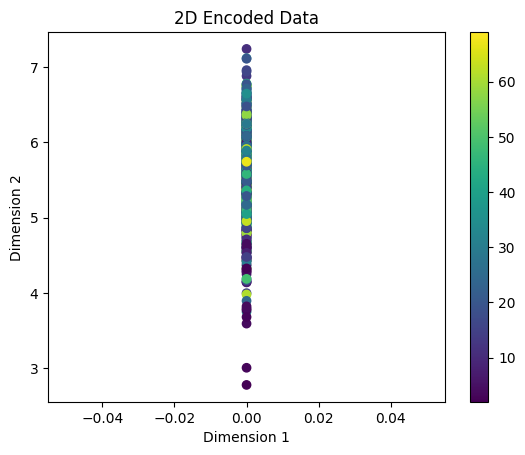

In [ ]:
# Autoencoder

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 2  # 2 dimensions for the encoder

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(64, activation='relu')(input_layer)
encoder = layers.Dense(32, activation='relu')(encoder)
encoder_output = layers.Dense(encoding_dim, activation='relu')(encoder)

decoder = layers.Dense(2, activation='relu')(encoder_output)

decoder_output = layers.Dense(1, activation='sigmoid')(decoder)

autoencoder = models.Model(input_layer, decoder_output)
encoder_model = models.Model(input_layer, encoder_output)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
autoencoder.fit(X_train, y_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Predict the encoded (2D) representations
encoded_data = encoder_model.predict(X_train)

# Plot the 2D encoded data
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=y_train.flatten(), cmap='viridis')
plt.colorbar()
plt.title('2D Encoded Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [ ]:
# Now, create a simple neural network to predict y_train from the 2D encoded data
predictor_input = layers.Input(shape=(encoding_dim,))
predictor = layers.Dense(64, activation='relu')(predictor_input)
predictor = layers.Dense(32, activation='relu')(predictor)
predictor_output = layers.Dense(1, activation='linear')(predictor)

predictor_model = models.Model(predictor_input, predictor_output)
predictor_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the predictor model
encoded_train_data = encoder_model.predict(X_train)
encoded_test_data = encoder_model.predict(X_test)
predictor_model.fit(encoded_train_data, y_train, epochs=50, batch_size=256, shuffle=True, validation_data=(encoded_test_data, y_test))

# Predict y values for the test set
y_pred = predictor_model.predict(encoded_test_data)

# Evaluate the model
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error: {mse}')

7/7 [==============================] - 0s 4ms/step
Epoch 1/50
4/4 [==============================] - 1s 54ms/step - loss: 1111.2952 - val_loss: 1070.1864
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 1089.9027 - val_loss: 1051.1700
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 1069.3325 - val_loss: 1031.7805
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 1048.3618 - val_loss: 1011.6245
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 1026.6537 - val_loss: 990.8602
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 1004.4027 - val_loss: 968.1904
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 979.3624 - val_loss: 943.5203
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 952.9459 - val_loss: 917.8989
Epoch 9/50
4/4 [==============================] - 0s 11ms/step - loss: 925.5354 - val_loss: 891.1489
Epoch 10/50
4/4 [=============

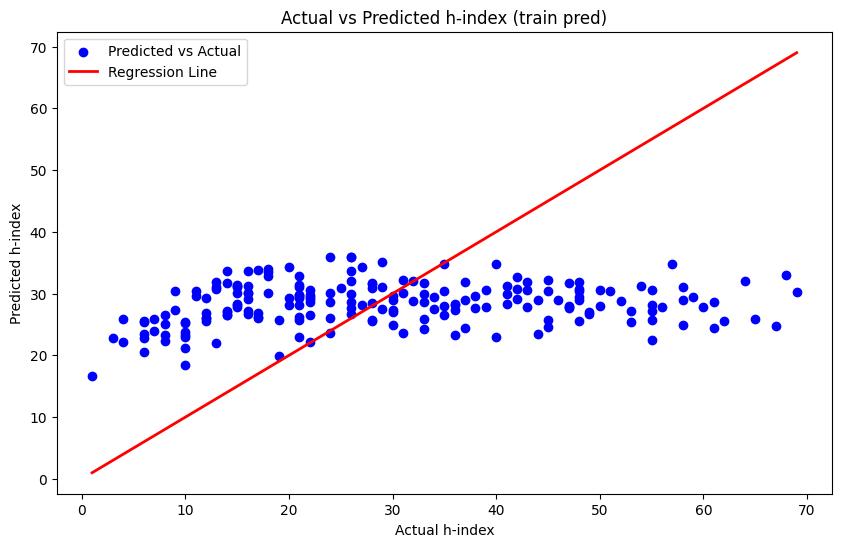

['aaa' 'aapl' 'aaronson' ... 'zwanzig' 'zweidimensionalen' 'zwitterionic']
(1000, 12606)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 200 and the array at index 1 has size 1

In [ ]:
plot(y_test, y_pred)